In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [122]:
train_data = pd.read_excel(r"Data_train.xlsx")

In [123]:
pd.set_option('display.max_columns',None)

In [124]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [126]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

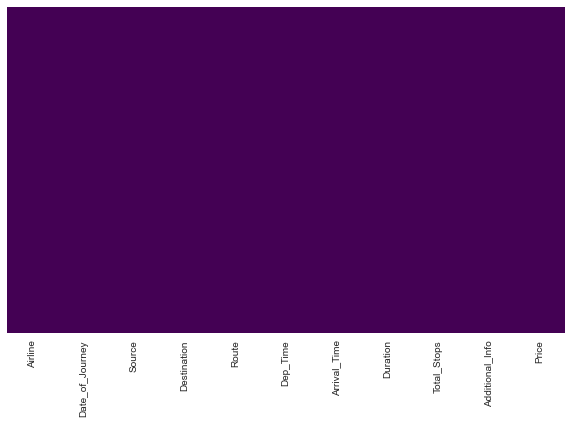

In [127]:
#Plot the Missing Data on HeatMap -
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

In [128]:
train_data.dropna(inplace=True)


## Data Cleaning

In [129]:
# Extracting day and month from Date of Journey
train_data['journey_day'] = pd.to_datetime(train_data.Date_of_Journey , format = "%d/%m/%Y").dt.day

In [130]:
train_data['journey_month'] = pd.to_datetime(train_data.Date_of_Journey , format = "%d/%m/%Y").dt.month

In [131]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [132]:

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [133]:
## Extracting hour and minute from departure time
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour

In [134]:
train_data['dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [135]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [136]:
## exatrcting hour and minute from arrival time
train_data['Arrival_hour']= pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_minute']= pd.to_datetime(train_data.Arrival_Time).dt.minute

In [137]:
train_data.drop(["Arrival_Time"], axis =1, inplace = True)


In [138]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [139]:
## Time taken for flight to reacg destination
duration = list(train_data['Duration'])


In [140]:
for i in range(len(duration)):
    if len(duration[i].split())!= 2: 
        
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [141]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [142]:
train_data['duration_hours']= duration_hours
train_data['duration_mins'] = duration_mins

In [143]:
train_data.drop(["Duration"], axis = 1, inplace = True)

###  Missing values

In [85]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
journey_day        0
journey_month      0
Dep_hour           0
dep_min            0
Arrival_hour       0
Arrival_minute     0
duration_hours     0
duration_mins      0
dtype: int64

There are no issing values in the data

In [144]:
train_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
Dep_hour            int64
dep_min             int64
Arrival_hour        int64
Arrival_minute      int64
duration_hours      int64
duration_mins       int64
dtype: object

Questions : 
1. which Airline has highest number of flights
2. which month has the highest flights
3. which place has the highest fare cost
4. Does number of stops increases the fare 
5. Which route has more fare 
6. relation between time and price
7. Highest count of flights from the source
8. Majority of the flights and their stops
9. Busiest Route 

## Univariate Analysis

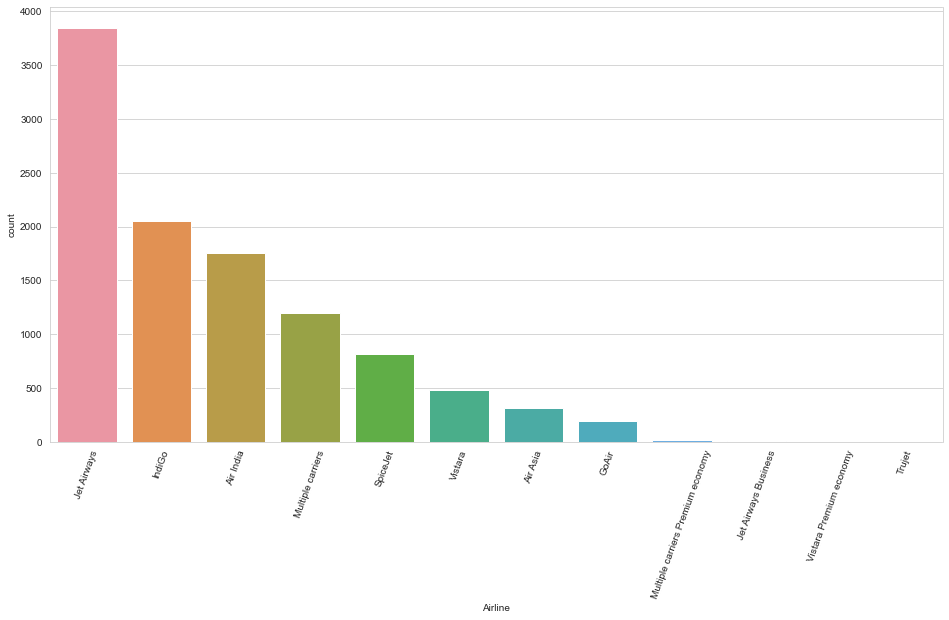

In [145]:
## 1. Which Airline has highest number of flights
figure = plt.figure(figsize=(16,8))
sns.countplot(x = "Airline", data = train_data, order = train_data['Airline'].value_counts().index)
plt.xticks(rotation = 70)
plt.show()

Jet Airways has the highest number of flights

In [146]:
## To Know about particular location has maximum number of flights travelled
data4 =  train_data['Source'].value_counts().nlargest()
data4


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

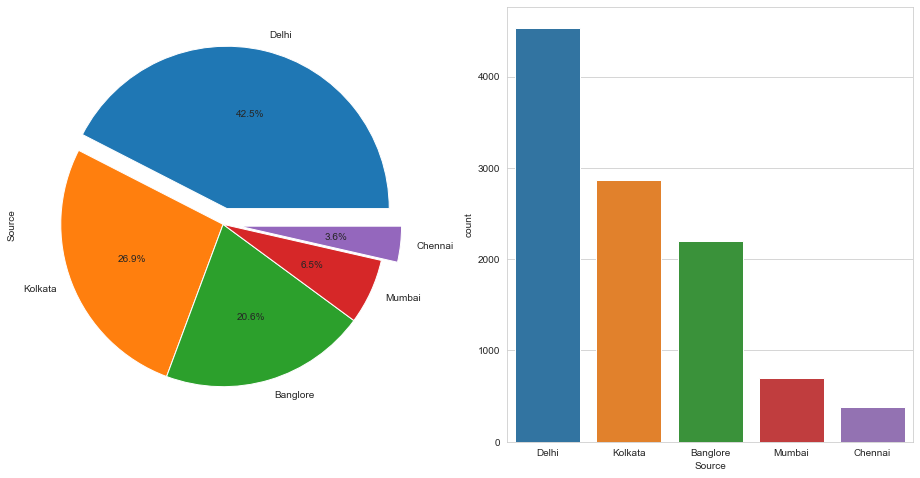

In [147]:
figure = plt.figure(figsize= (16,8))
plt.subplot(1,2,1)
exp = [0.1,0,0,0,0.1]
train_data['Source'].value_counts().plot.pie(autopct='%1.1f%%', explode = exp)
plt.subplot(1,2,2)
sns.countplot(x= "Source", data = train_data, order = train_data['Source'].value_counts().index)

More flights originate from Delhi, which is followed by Kolkata and least in chennai


The bulk of flights arrive in Cochin as their final destination.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

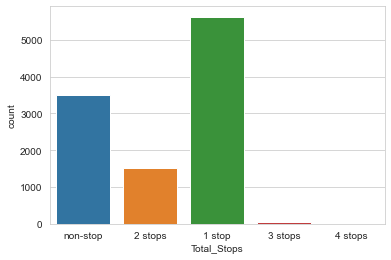

In [148]:
# Stops
sns.countplot(x = 'Total_Stops', data =  train_data)

Most of the flights have 1 stop

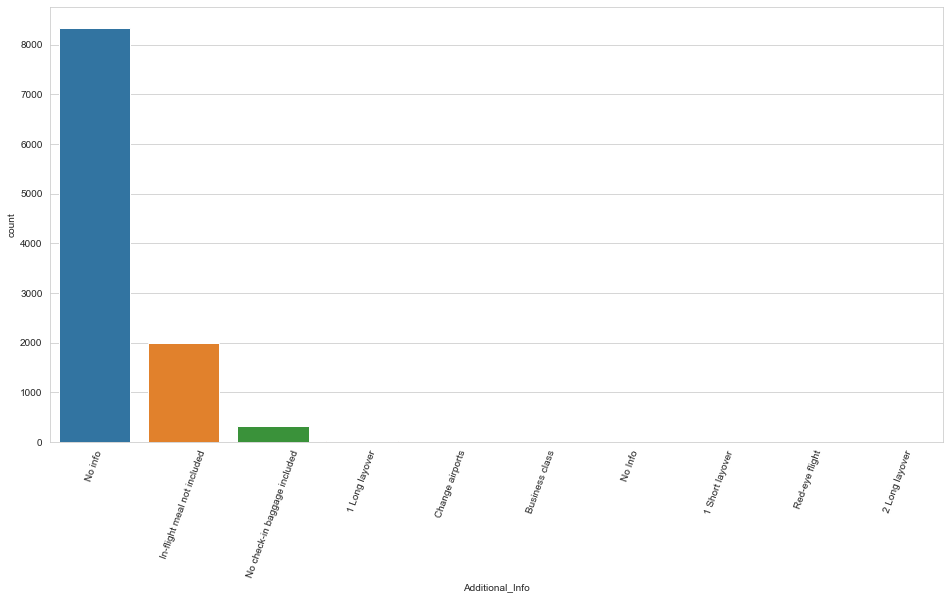

In [149]:
## Additional info
figure = plt.figure(figsize=(16,8))
sns.countplot(x = "Additional_Info", data = train_data, order = train_data['Additional_Info'].value_counts().index)
plt.xticks(rotation = 70)
plt.show()

Most of the flights didn't provide additional details.

<AxesSubplot:xlabel='journey_month', ylabel='count'>

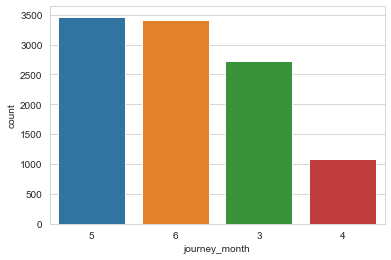

In [150]:
#Month
sns.countplot(x = "journey_month", data = train_data, order = train_data['journey_month'].value_counts().index)

more passengers travelled in the month of may followed by june. 

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

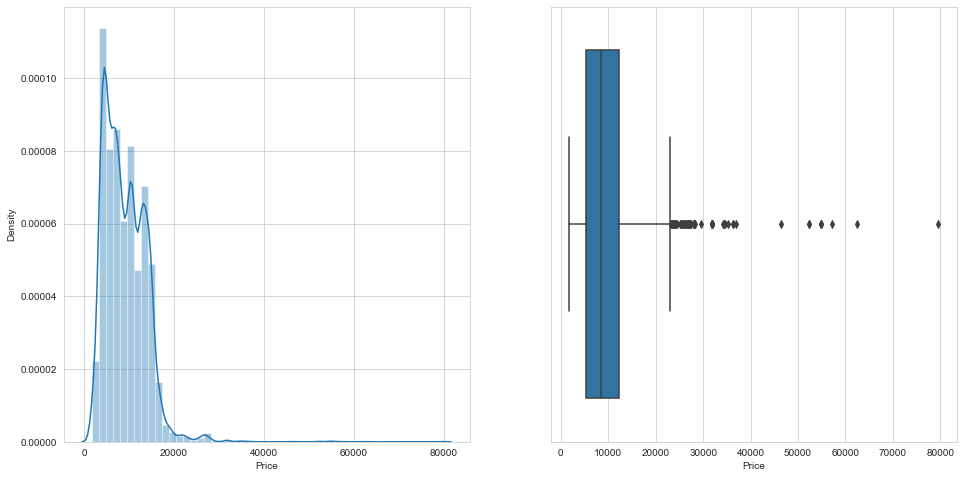

In [151]:
## Univariate Analysis for numeric values
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.distplot(train_data['Price'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Price'])

Majority if the flighhts fare lie in range of 3000 to 18000

Minimum 0
Maximum 47


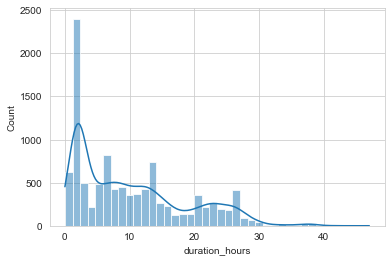

In [152]:
#duration
sns.histplot(train_data['duration_hours'], kde = True)
print('Minimum',train_data['duration_hours'].min())
print('Maximum',train_data['duration_hours'].max())


In [153]:
train_data[train_data['duration_hours']==0]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,0,5


Minimum duration for a flights is 5 mins.

## Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

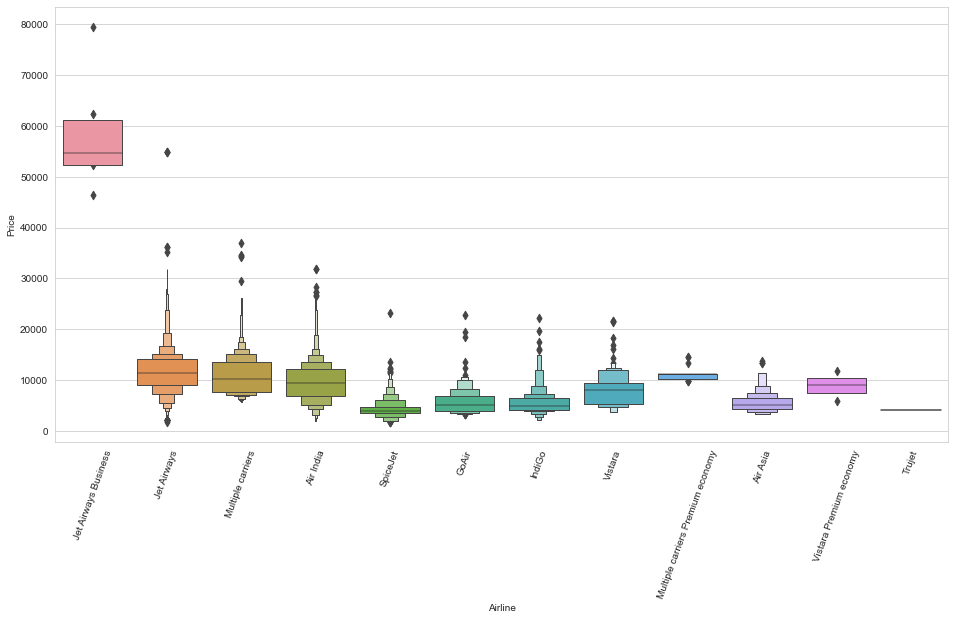

In [154]:
## Q. Which airline has the highest price
plt.figure(figsize=(16,8))
sns.boxenplot(x = 'Airline', y='Price', data = train_data.sort_values('Price',ascending = False))
plt.xticks(rotation = 70)

In [155]:
data = train_data.groupby(['Airline'], as_index=False)['Price'].agg('mean')
data.sort_values(by='Price', ascending=False, inplace=True)
data

,Airline,Price
5,Jet Airways Business,58358.666667
4,Jet Airways,11643.923357
7,Multiple carriers Premium economy,11418.846154
6,Multiple carriers,10902.678094
1,Air India,9612.427756
11,Vistara Premium economy,8962.333333
10,Vistara,7796.348643
2,GoAir,5861.056701
3,IndiGo,5673.682903
0,Air Asia,5590.260188


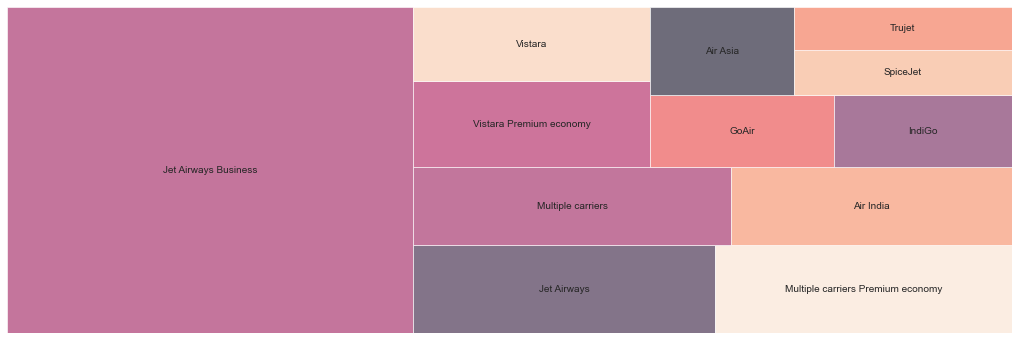

In [156]:
import squarify
plt.figure(figsize=(18,6))
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= data["Price"].values# proportions of the categories
label=data["Airline"]
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.axis('off')
plt.show()


Jettairways bussiness has the highst price and remaining all has almost same median.

<AxesSubplot:xlabel='Source', ylabel='Price'>

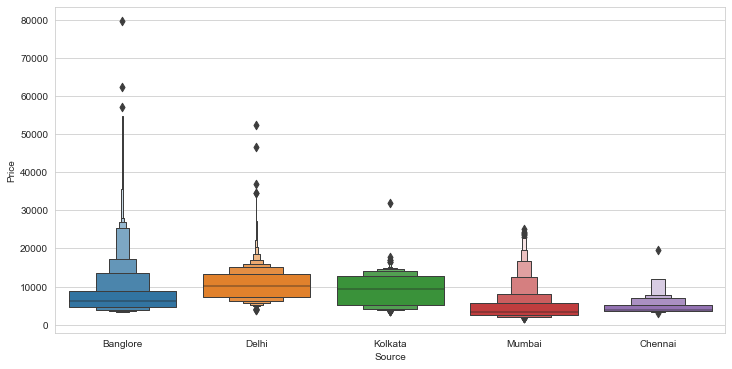

In [157]:
# Q. From which source the price is high
plt.figure(figsize=(12,6))
sns.boxenplot(x ='Source', y ='Price', data = train_data.sort_values('Price', ascending = False))

The mean price for a flight is greatest in the Delhi source, 
but there are several outliers in the Bangalore source where the price is larger than 60000.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

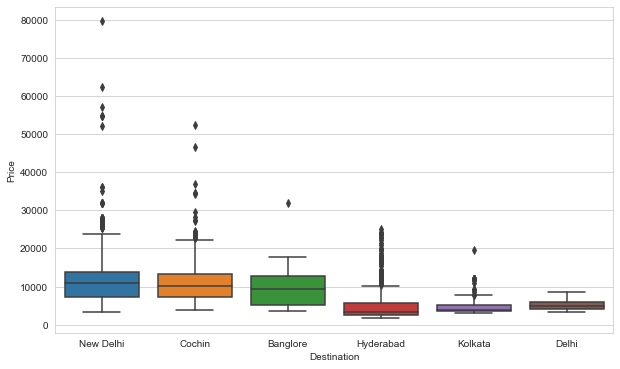

In [158]:
# destination vs price 
plt.figure(figsize= (10,6))
sns.boxplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending = False))

New Delhi and Cochin destinations has the highest price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

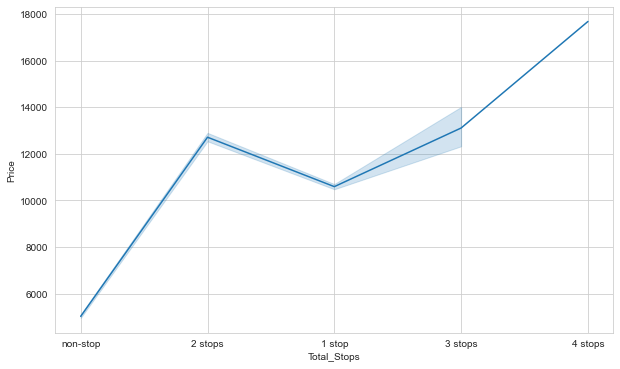

In [159]:
## Relation between number of stops and price
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Total_Stops', y = 'Price', data = train_data)

There is a positive correlation between the number of stops and price , Price go high when the total stops increases.

<Figure size 720x432 with 0 Axes>

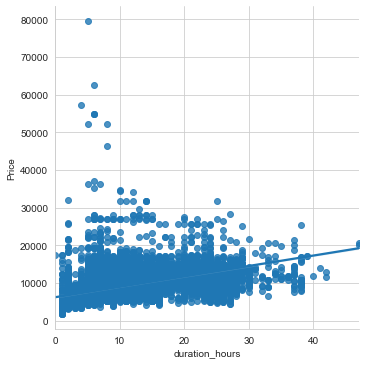

In [160]:
# Duration vs Fare
plt.figure(figsize= (10,6))
sns.lmplot(x = 'duration_hours', y = 'Price', data = train_data)


Fight price increase with the duration time 

<AxesSubplot:xlabel='journey_month', ylabel='Price'>

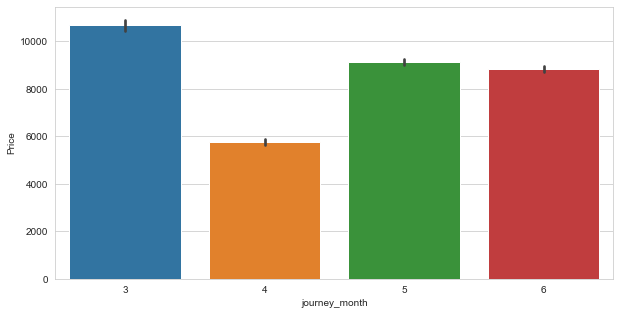

In [161]:
plt.figure(figsize = (10,5))
sns.barplot(x = "journey_month", y ="Price",data = train_data.sort_values('Price', ascending = False))

In the month of March , the prices are high

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

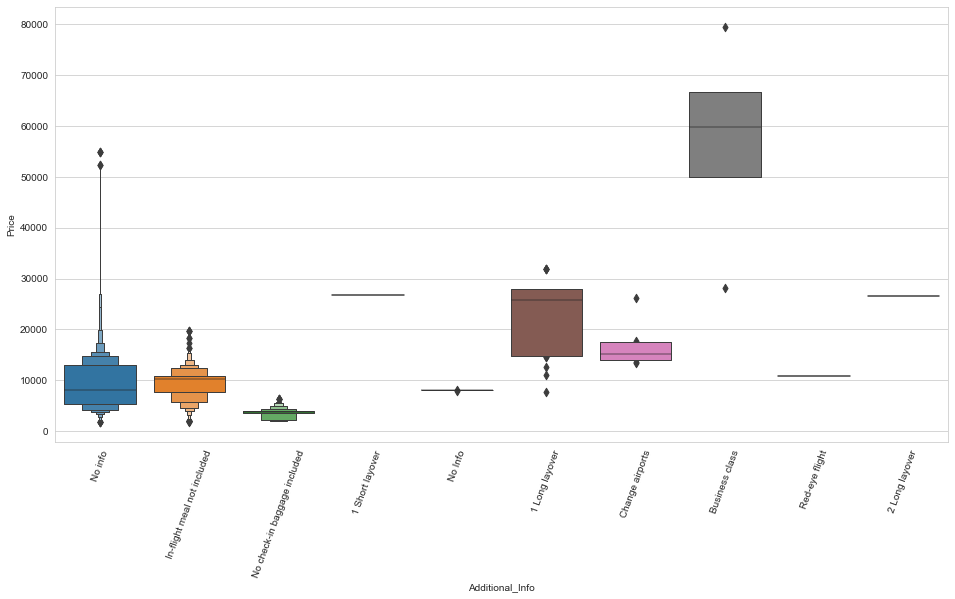

In [162]:
## Additional info vs Price
plt.figure(figsize =(16,8))
sns.boxenplot(x = "Additional_Info", y ="Price", data = train_data)
plt.xticks(rotation = 70)

Where the supplementary information includes Business class followed by 1 long stopover or 1 short/long layover, the flight price is higher.

In [163]:
## Top 10 Costliest routes
data = train_data.groupby(['Route'], as_index=False)['Price'].agg('mean')
data.sort_values(by='Price', ascending=False, inplace=True)
data.head(10)


,Route,Price
44,BOM → DED → DEL → HYD,24115.000000
51,BOM → JDH → DEL → HYD,23867.000000
58,BOM → VNS → DEL → HYD,23528.000000
57,BOM → UDR → DEL → HYD,22950.000000
38,BOM → BDQ → DEL → HYD,22792.500000
107,DEL → DED → BOM → COK,19539.500000
115,DEL → IXU → BOM → COK,19381.333333
52,BOM → JDH → JAI → DEL → HYD,18293.000000
50,BOM → JAI → DEL → HYD,17926.000000
14,BLR → CCU → BBI → HYD → VGA → DEL,17686.000000


In [164]:
## Price comparison in terms of Airline and Route
data1 = train_data.groupby(['Route',"Airline"])['Price'].agg('mean').to_frame()
data1.sort_values(by='Price', ascending=False, inplace=True)
data1.head(10)


Price
Route                 Airline                           
BLR → BOM → DEL       Jet Airways Business  64722.666667
BLR → MAA → DEL       Jet Airways Business  57209.000000
DEL → ATQ → BOM → COK Jet Airways Business  49387.500000
BOM → DED → DEL → HYD Jet Airways           24115.000000
BOM → JDH → DEL → HYD Air India             23879.000000
                      Jet Airways           23843.000000
BOM → VNS → DEL → HYD Jet Airways           23528.000000
BOM → UDR → DEL → HYD Jet Airways           22950.000000
BOM → BDQ → DEL → HYD Jet Airways           22792.500000
BOM → IDR → DEL → HYD Jet Airways           20845.000000

Jet Airways Bussiness has the highest cost  for Bangalore to Delhi route with 1 stop.

In [165]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<AxesSubplot:xlabel='Dep_hour', ylabel='Price'>

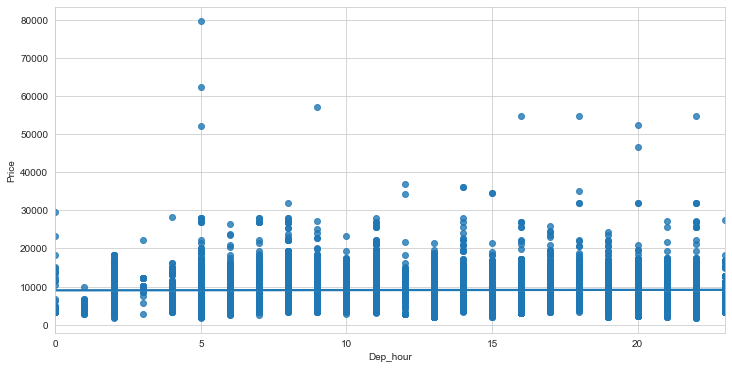

In [166]:
## Relation between departure hour and price
plt.figure(figsize=(12,6))
sns.regplot(x="Dep_hour", y = "Price", data = train_data)

The flights in the early morning time has highest price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

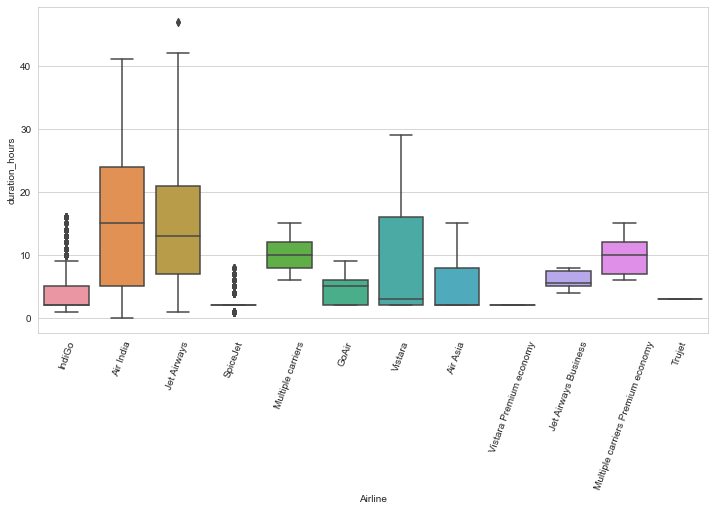

In [167]:
# Which Airline has highest duration
plt.figure(figsize =(12,6))
sns.boxplot(x = "Airline", y="duration_hours", data = train_data)
plt.xticks(rotation= 70)

Air India flights have the longest duration, while Indigo flights have the shortest.

In [168]:
## What is the  source and destination that takes the longest?
data2 = train_data.groupby(['Source',"Destination"])['duration_hours'].agg('mean').to_frame()
data2.sort_values(by='duration_hours', ascending=False, inplace=True)
data2

,,duration_hours
Source,Destination,
Delhi,Cochin,13.209436
Kolkata,Banglore,11.975618
Banglore,New Delhi,10.356223
Mumbai,Hyderabad,2.743185
Banglore,Delhi,2.221344
Chennai,Kolkata,2.000000


The longest travel time is from Delhi to Cochin and shortest is from chennai to kolkata.


In [169]:
## What is the  source and destination that has the highest price?
data3 = train_data.groupby(['Source',"Destination"])['Price'].agg('mean').to_frame()
data3.sort_values(by='Price', ascending=False, inplace=True)
data3

,,Price
Source,Destination,
Banglore,New Delhi,11917.716738
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,Delhi,5143.918577
Mumbai,Hyderabad,5059.708752
Chennai,Kolkata,4789.892388


The flight from Bangalore to New Delhi has the highest price.

In [170]:
## Which route has more Airlines
data4 = train_data.groupby(['Source',"Destination"])['Airline'].agg('count').to_frame()
data4.sort_values(by='Airline', ascending=False, inplace=True)
data4 = data4.reset_index()
data4


,Source,Destination,Airline
0,Delhi,Cochin,4536
1,Kolkata,Banglore,2871
2,Banglore,Delhi,1265
3,Banglore,New Delhi,932
4,Mumbai,Hyderabad,697
5,Chennai,Kolkata,381


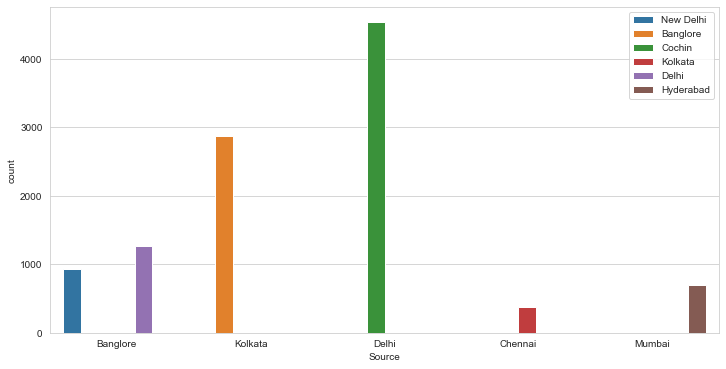

In [171]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Source',hue='Destination',data=train_data)
plt.legend(loc='upper right')

In [172]:
train_data['src_destn']= train_data['Source']+"-"+train_data['Destination']


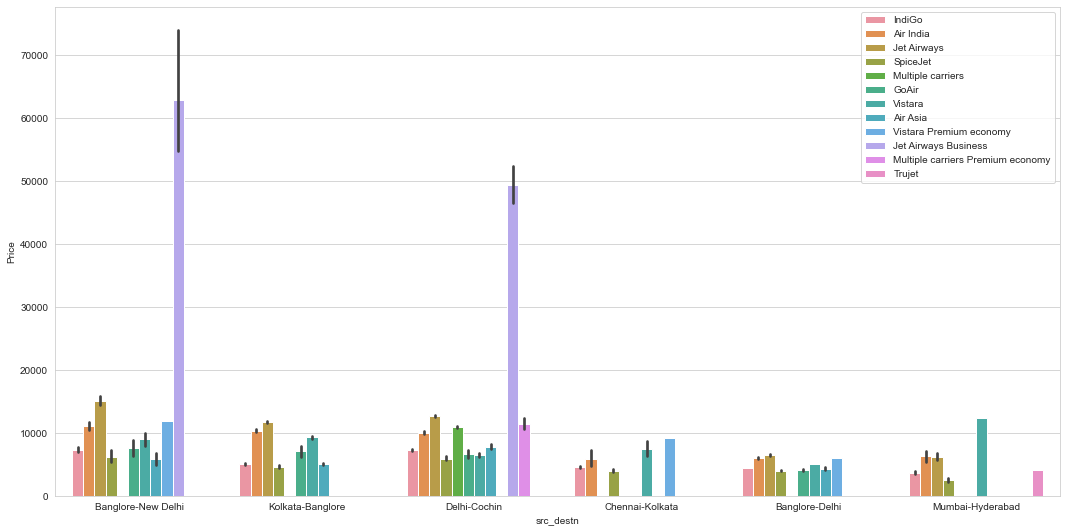

In [173]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'src_destn',y = 'Price', hue = "Airline", data =  train_data)
plt.legend(loc='upper right')

In [174]:
JetAirway Business airline from Bangalore to new delhi and delhi to Cochin has highest fares.

SyntaxError: invalid syntax (<ipython-input-174-4bc6c8d574f1>, line 1)

In [ ]:
# Which Airline is high for particular source
plt.figure(figsize = (12,6))
sns.countplot(x = 'Source', hue = "Airline", data =  train_data)
plt.legend(loc='upper right')

Jet Airways are high in number for Bangalore, Kolkata and Delhi sources.

In [ ]:
## WhichAirline has more number of stops
plt.figure(figsize = (12,6))
sns.countplot(x = 'Airline', hue = "Total_Stops", data =  train_data)
plt.xticks(rotation = 70
          )
plt.legend(loc='upper right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

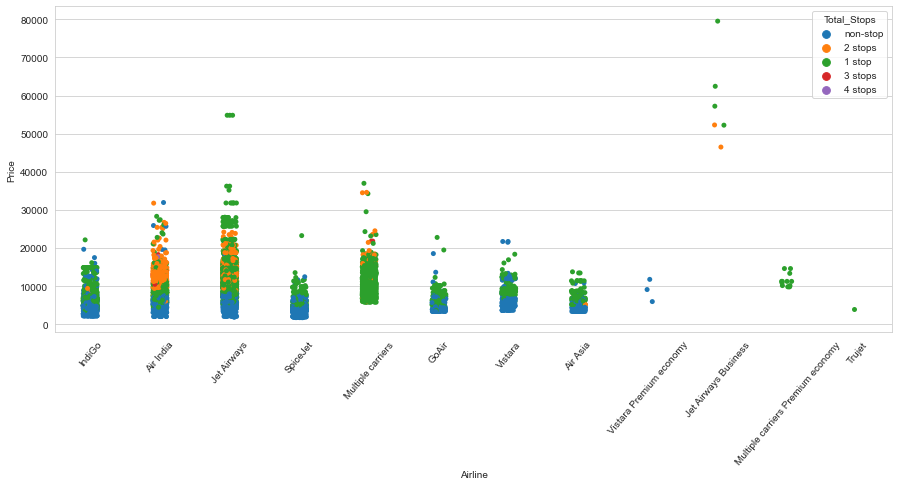

In [175]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Airline',y='Price',hue='Total_Stops',data=train_data)
plt.xticks(rotation=50)


In [176]:
# Removing Src-dstn variable
train_data.drop(['src_destn'], axis =1, inplace = True)

In [177]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [178]:
train_data.to_csv(r'train_data.csv')

price have high corelation with duration